# Researches on how to interpret the data from the vibrations measurements

## Type of things to check :

- Low frequencies/High frequencies : is there a difference in amplitude ? (Look in Matlab)
- Low frequencies/High frequencies : is there a significant different in the fundamental ? Is there a spread of the spectral density energy over the whole set of frequencies or is it concentrated around a fondamental harmonic ? (Look in Matlab)
- Is there a correlation between the different vibrations for the same Axial depth that can be directly related to the tool spindle speed ? (Python)
    - Check correlation matrix for the data that uses the same axial depth
    - Check correlation matric for the data that uses different axial depth but the same spindle speed.
- Search for different plots methods + automatize them in order to get fast and understable insight form the different vibrations measurments, the goals are :
    - spectrogram
    - harmonic distorsion
    - pwelch (wtf?)
    - spectral kurtosis (see on Matlab)
    - Identify Condition Indicators
    - Rolling Element Bearing Fault Diagnosis
    
- Determine a methodology to derive performance indices in order that will be later on used as features in a machine learning algorithm in order to detect if the system is working properly or not.
    - Automatize the input of raw data
    - Compute the information, preferably with a fonction from Matlab
    - Derive the indices that will be used.
    
- Is there an easy way to look at the data and see if there was chatter during experiment ? 
    
## Additionnal considerations :    
    
- Is it possible to think of a solution that could be implemented online or does it have to be necesseraly offline in order to first analyze the FRF ?
- What about the other data available : sound and images ? 
- How to couple the different types of data into one decision algorithm ? (surely, there will be a weighted sum with a minimization problem to solve)




## 1) Check for correlation matrices for the different Harmonics files of the FRF's

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



file_name = 'FRF_freqap4-0.csv'

def df_maker(file_name):
    datapath = 'D:\Vibrations-mems-data' + '\\'
    tot_file_name = datapath + file_name
    df= pd.read_csv(tot_file_name)
    df = df[~(df==0).all(axis=1)]
    df.reset_index(drop=True, inplace = True)
    return df

df = df_maker(file_name)

In [181]:
df.head()

,exp1,exp2,exp3,exp4,exp5,exp6,exp7,exp8,exp9,exp10,exp11,exp12,exp13,exp14,exp15,exp16,exp17,exp18,exp19,exp20
0,593,101,259,318,351,341,232,231,219,374,387,204,207,274,237,275,318,291,332,228
1,890,398,514,634,699,682,460,458,434,747,770,403,412,544,474,548,634,580,659,455
2,1184,695,769,1108,1046,1190,690,686,651,1305,1155,605,619,815,708,821,951,870,987,793
3,1777,1191,1026,1424,1395,1529,918,914,867,1863,1538,1207,823,1087,945,1095,1267,1159,1317,1020
4,2220,1587,1411,1900,1917,2040,1148,1142,1083,2234,1922,1406,1028,1358,1179,1368,1583,1447,1646,1359


In [177]:
# Create correlation matrix.
#matrix = data.corr(
 #   method = 'pearson' # The method for the correlation
  #  min_periods = 1 # Min number of observations required)
#)
matrix = df.corr()
# Round to 2digits.
matrix = matrix.round(2)

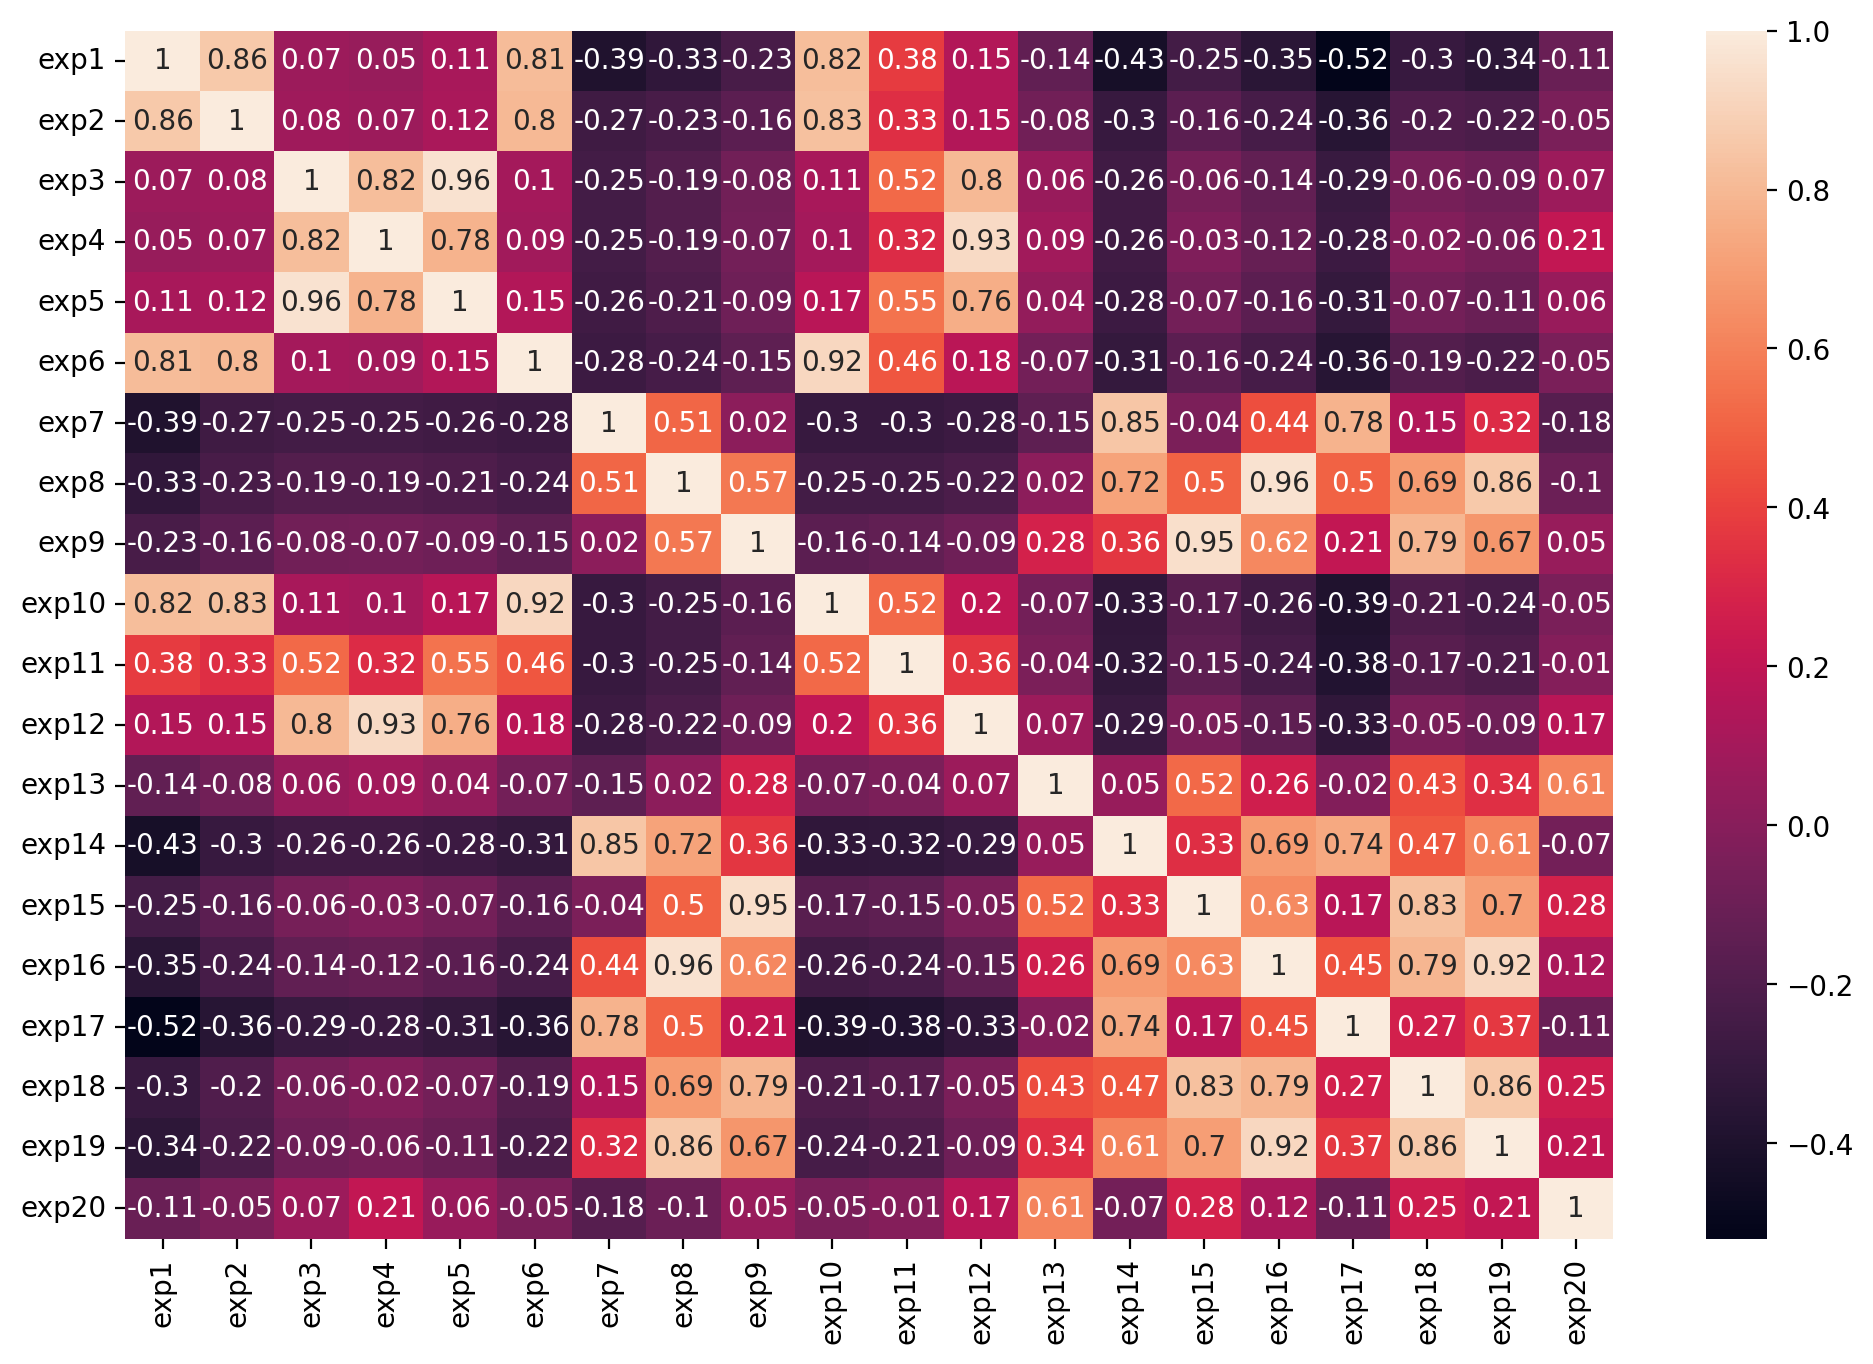

In [178]:
sns.heatmap(matrix, annot=True)
# Make the plot larger
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
# Show the plot
plt.show()

## Conclusion :

**WARNING** : beware of the '0' that fill the vectors, they could have an effect on the correlation

There seems to be little to none correlation between the natural frequencies from different experiments. This show that the FRF that is measurement will largely depend on the spindle speed that is used during a specific experiment. There will no be re-occuring fundamental frequencies that are re-obtained over and over for different spindle speed.

**Subsidiary question** : What about taking the same spindle speed and varying the depth of cut ? Do we get different FRF or do we get the same FRF with variation in the amplitude of the response ? 

## 1.b ) Check for correlation matrices in harmonics : same a_depth != spindle speed

In [182]:
# !!! WARNING !!! #

"""

Le code matlab n'est pas 100% fonctionnel et des fichiers excels sont toujours manquants dus à des erreurs
dans la taille des tables (données érronées?, fichiers corrompus?, experience ratées?) --> à débug

15/12
fichiers fonctionnels : 1.5 ; 3 ; 4 ; 5

"""

#file_a1 = 'FRF_freqap1-0.csv'
file_a1_5 = 'FRF_freqap1-5.csv'
#file_a2 = 'FRF_freqap2-0.csv'
file_a3 = 'FRF_freqap3-0.csv'
file_a4 = 'FRF_freqap4-0.csv'
file_a5 = 'FRF_freqap5-0.csv'
#file_a6 = 'FRF_freqap6-0.csv'

df_a1_5 = df_maker(file_a1_5)
df_a3 = df_maker(file_a3)
df_a4= df_maker(file_a4)
df_a5 = df_maker(file_a5)

In [46]:
# List of RPM sorted by experiment number
RPM = [3000,
 3000,
 3500,
 4000,
 4250,
 4500,
 4750,
 5000,
 5250,
 5500,
 5750,
 6000,
 6250,
 6500,
 7000,
 7500,
 8000,
 8500,
 9000,
 3000]

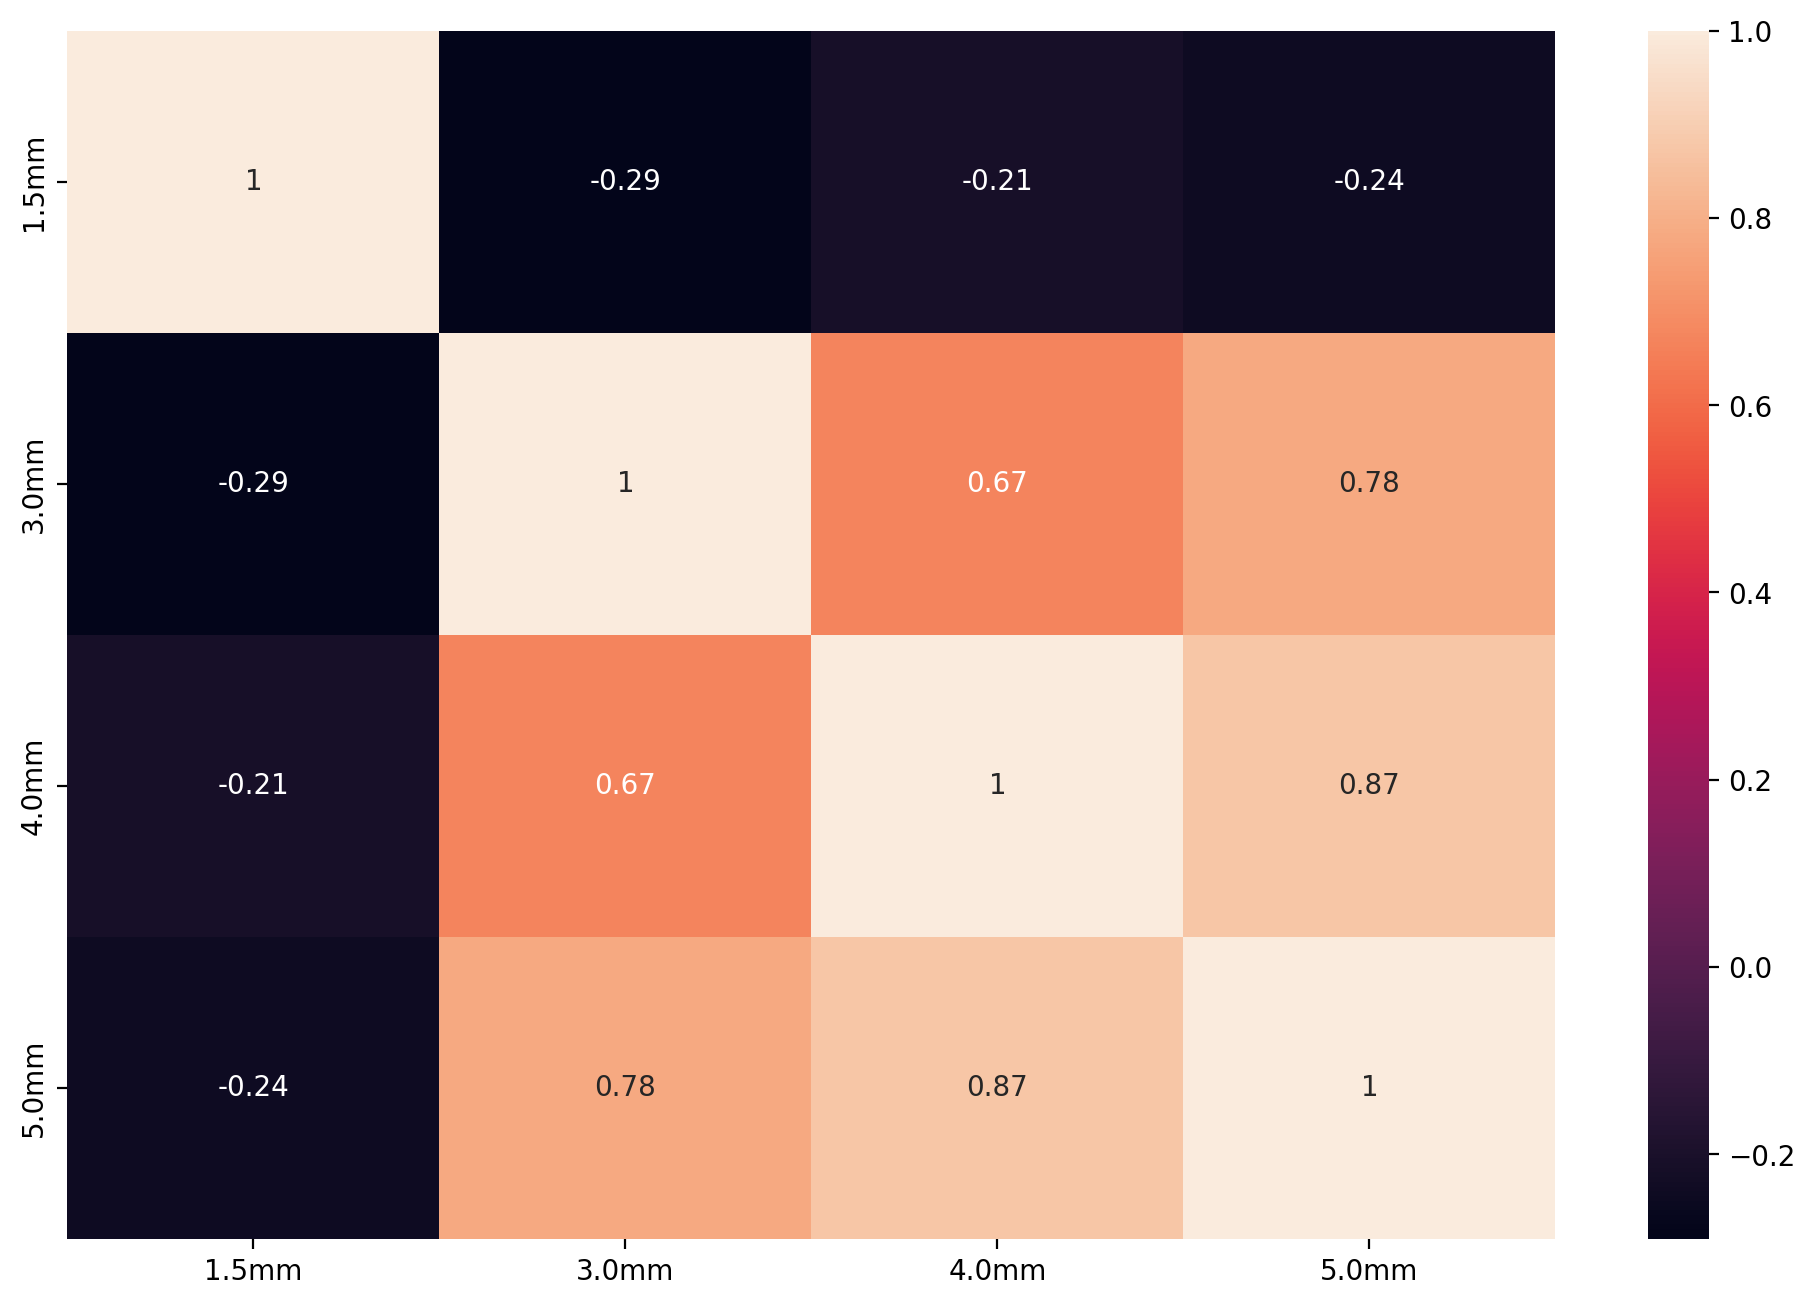

In [193]:
iter = 0
data_dic = {}

# Create a dictionnary with the data relative to the different experiments grouped together -> groups by RPM

for i in df_a3.columns: # run on column names
    
    RPM_str = str(RPM[iter])
    data_list = [df_a1_5[i].tolist(),df_a3[i].tolist(),df_a4[i].tolist(),df_a5[i].tolist()]
    data_dic[i] = data_list
    iter += 1

# Create a correlation matrix for each of the experiment number -> corr mat. per RPM


# Choose 1 experiment and plot the corresponding heat map for the correlation matrix

exp_list = data_dic['exp20']

min_list = exp_list[0]
for i in range(len(exp_list)-1):
    if len(min_list) > len(exp_list[i+1]):
        min_list = exp_list[i+1]

for i in range(len(exp_list)):
    exp_list[i] = exp_list[i][0:len(min_list)]


data = {'1.5mm' : exp_list[0],
        '3.0mm' : exp_list[1],
        '4.0mm' : exp_list[2],
        '5.0mm' : exp_list[3]}
df = pd.DataFrame.from_dict(data)
matrix = df.corr().round(2)
# plot the resuls
sns.heatmap(matrix, annot=True)
# Make the plot larger
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
# Show the plot
plt.show()

## Conclusion : 

- At high speed : exp 15 (7000RPM) to exp 19 (9000RPM) -> the natural frequencies correlate very well. This shows that variation for the depth of cut of 1[mm] will excite the system in a similar manner. The next question is then : what about the amplitude ?
- At medium speed : exp 10 (5500RPM) to exp 14 (6500RPM) -> no apparent correlation, the response of the system will greatly vary depending of the depth of cut
- At 5000 RPM (experiment 8) : the correlation is pretty strong for all depth of cut. Maybe the spindle speed is exciting the system ? -> look it up in the FRF response
- At low speed : exp 1 to exp 7 -> no correlation, the frequency largely depends on the depth of cut. Execpt for 3000RPM where there is strong correlation between 3mm and 4mm